In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from datetime import timedelta
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

In [2]:
errors = np.random.normal(0,1,400)

In [3]:
dateIndex = pd.date_range(start = '9/1/2019',end = '1/1/2020')

In [5]:
mu = 50
series = []
for t in range(1,len(dateIndex)+1):
    series.append(mu + 0.4*errors[t-1]+0.3*errors[t-2]+errors[t])

In [8]:
series = pd.Series(series,dateIndex)
series = series.asfreq(pd.infer_freq(series.index))

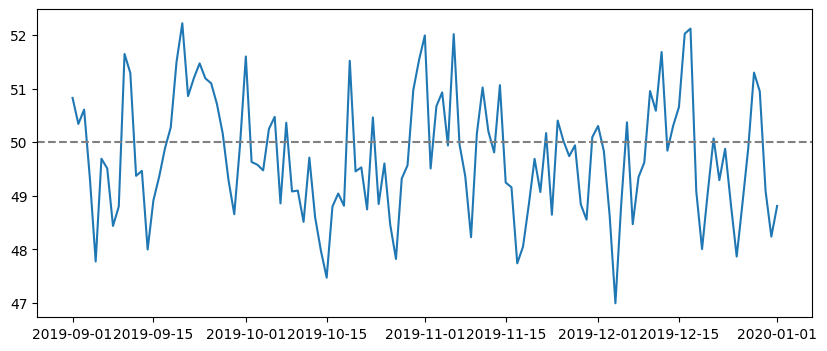

In [9]:
plt.figure(figsize = (10,4))
plt.plot(series)
plt.axhline(mu,linestyle = '--',color = 'grey')

<BarContainer object of 10 artists>

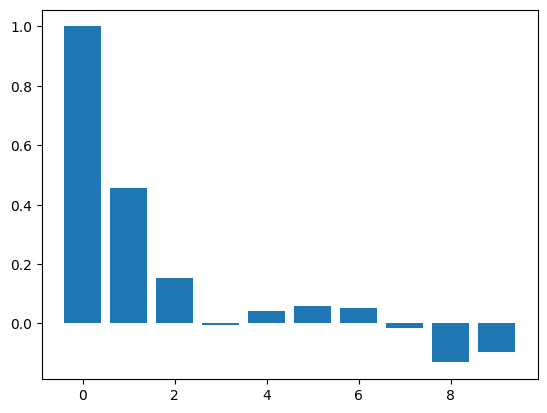

In [11]:
acfVals = acf(series)
nLags = 10
plt.bar(range(nLags),acfVals[:nLags])

<BarContainer object of 20 artists>

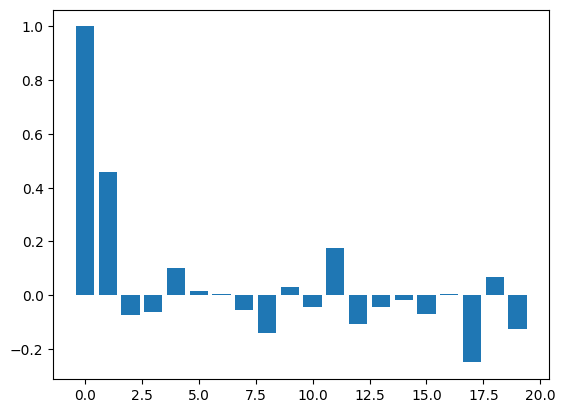

In [15]:
pacfVals = pacf(series)
nLags = 20
plt.bar(range(nLags),pacfVals[:nLags])

In [18]:
trainEnd = datetime(2019,12,30)
testEnd = datetime(2020,1,1)

trainData = series[:trainEnd]
testData = series[trainEnd + timedelta(days = 1):testEnd]

In [35]:
testData

2019-12-31    48.237191
2020-01-01    48.809220
Freq: D, dtype: float64

In [20]:
model = ARIMA(trainData,order = (0,0,2))

In [22]:
modelFit = model.fit()

In [32]:
print(modelFit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -171.474
Date:                Wed, 08 Mar 2023   AIC                            350.947
Time:                        21:50:08   BIC                            362.130
Sample:                    09-01-2019   HQIC                           355.489
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7580      0.153    324.859      0.000      49.458      50.058
ma.L1          0.4832      0.096      5.058      0.000       0.296       0.670
ma.L2          0.2051      0.096      2.128      0.0

In [26]:
predStartDate = testData.index[0]
predEndDate = testData.index[-1]

In [36]:
print(predStartDate,predEndDate)

2019-12-31 00:00:00 2020-01-01 00:00:00


In [27]:
predictions = modelFit.predict(start = predStartDate, end = predEndDate)

In [37]:
print(predictions)

2019-12-31    49.289801
2020-01-01    49.519320
Freq: D, Name: predicted_mean, dtype: float64


In [38]:
testData

2019-12-31    48.237191
2020-01-01    48.809220
Freq: D, dtype: float64

In [28]:
residuals = testData - predictions

In [39]:
print(residuals)

2019-12-31   -1.052611
2020-01-01   -0.710100
Freq: D, dtype: float64


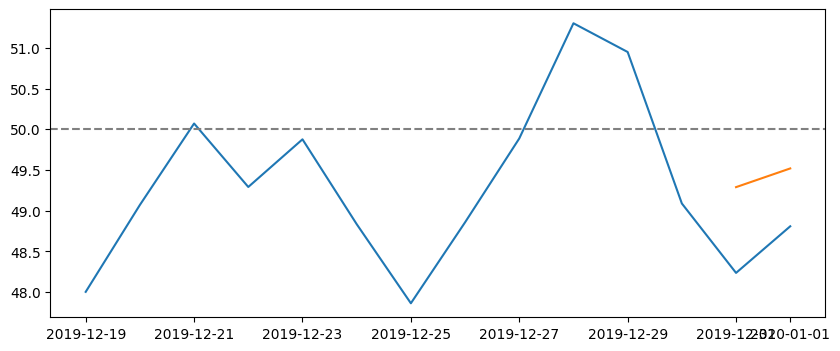

In [40]:
plt.figure(figsize = (10,4))
plt.plot(series[-14:])
plt.plot(predictions)
plt.axhline(50,linestyle = '--',color = 'grey')